# Lab 3

## 1.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import math

C:\Users\Kaiyue Hu\AppData\Local\Temp\ipykernel_11456\3303696043.py:15: RuntimeWarning: invalid value encountered in divide
  H_a = (1/C_s) * ((1-np.exp(-1j*2*np.pi*f*T))/(2j*np.pi*f))


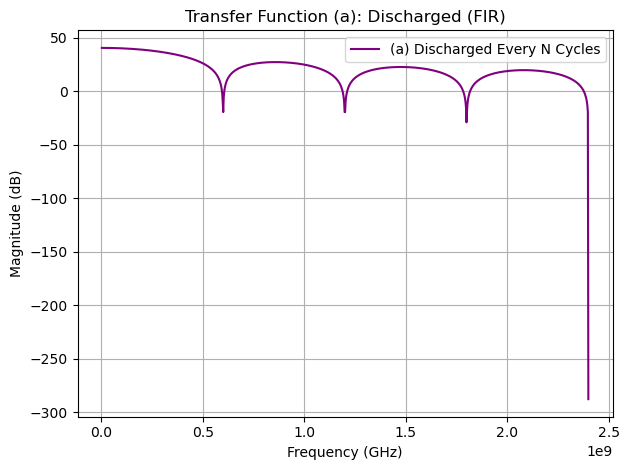

In [ ]:
def first_a():


   
    N = 8
    f_clk = 2.4e9  
    T_s = 1 / f_clk  
    C_s = 15.925e-12  
    T = T_s * N / 2

 
    f = np.linspace(0, 2.4e9, 1000)

    
    H_a = (1/C_s) * ((1-np.exp(-1j*2*np.pi*f*T))/(2j*np.pi*f))

    
    plt.figure()
    plt.plot(f, 20 * np.log10(np.abs(H_a)), label="(a) Discharged Every N Cycles", color='purple')
    plt.xlabel("Frequency (GHz)")
    plt.ylabel("Magnitude (dB)")
    plt.title("Transfer Function (a): Discharged (FIR)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

first_a()



C:\Users\Kaiyue Hu\AppData\Local\Temp\ipykernel_11456\380725319.py:15: RuntimeWarning: divide by zero encountered in divide
  H_a = (1/C_s) * (1/(2j*np.pi*f))
C:\Users\Kaiyue Hu\AppData\Local\Temp\ipykernel_11456\380725319.py:15: RuntimeWarning: invalid value encountered in divide
  H_a = (1/C_s) * (1/(2j*np.pi*f))
C:\Users\Kaiyue Hu\AppData\Local\Temp\ipykernel_11456\380725319.py:15: RuntimeWarning: invalid value encountered in multiply
  H_a = (1/C_s) * (1/(2j*np.pi*f))


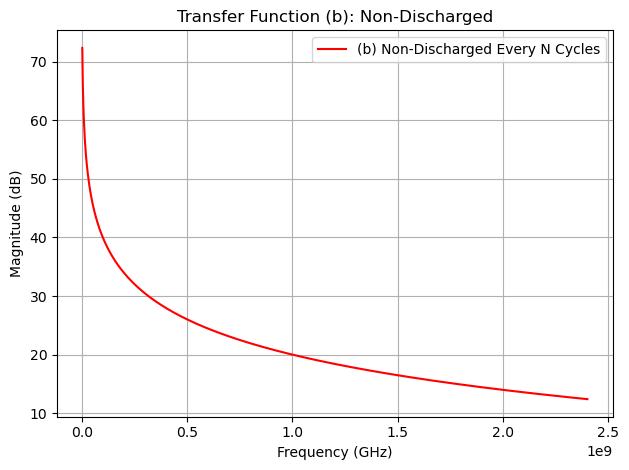

In [ ]:
def first_b():


  
    N = 8
    f_clk = 2.4e9  
    T_s = 1 / f_clk  
    C_s = 15.925e-12  
    T = T_s * N / 2

    
    f = np.linspace(0, 2.4e9, 1000)

  
    H_a = (1/C_s) * (1/(2j*np.pi*f))

    
    plt.figure()
    plt.plot(f, 20 * np.log10(np.abs(H_a)), label="(b) Non-Discharged Every N Cycles", color='red')
    plt.xlabel("Frequency (GHz)")
    plt.ylabel("Magnitude (dB)")
    plt.title("Transfer Function (b): Non-Discharged")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

first_b()



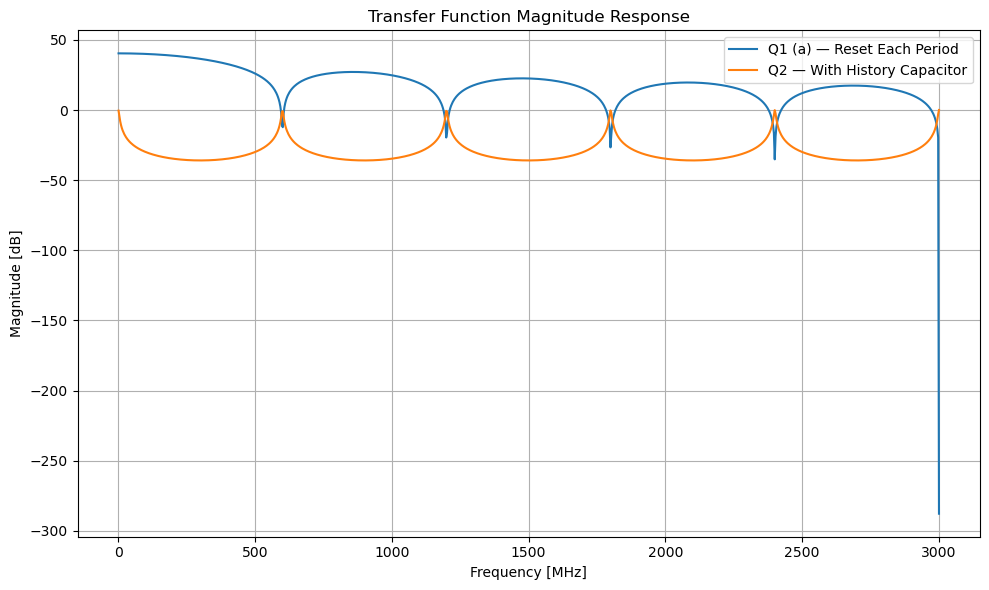

In [ ]:
def second():

 
    C_s = 15.925e-12   
    C_H = 15.425e-12   
    C_R = 0.5e-12      
    N = 8
    f_clk = 2.4e9     
    T = (N / f_clk) / 2      

   
    f = np.linspace(1e6, 3e9, 1000)   
    w = 2 * np.pi * f

    
    H1a = (1 - np.exp(-1j * w * T)) / (1j * w * C_s)

  

    a1 = C_H / (C_H + C_R)
    b1 = 1 - a1


    z = np.exp(1j * w * T)
    H2 = b1 / (1 - a1 / z)   
    # H2 = H1a * H2


    plt.figure(figsize=(10, 6))
    plt.plot(f * 1e-6, 20 * np.log10(np.abs(H1a)), label='Q1 (a) — Reset Each Period')
    # plt.plot(f * 1e-6, 20 * np.log10(np.abs(H1b)), label='Q1 (b) — No Reset')
    plt.plot(f * 1e-6, 20 * np.log10(np.abs(H2)), label='Q2 — With History Capacitor')
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('Magnitude [dB]')
    plt.title('Transfer Function Magnitude Response')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

second()


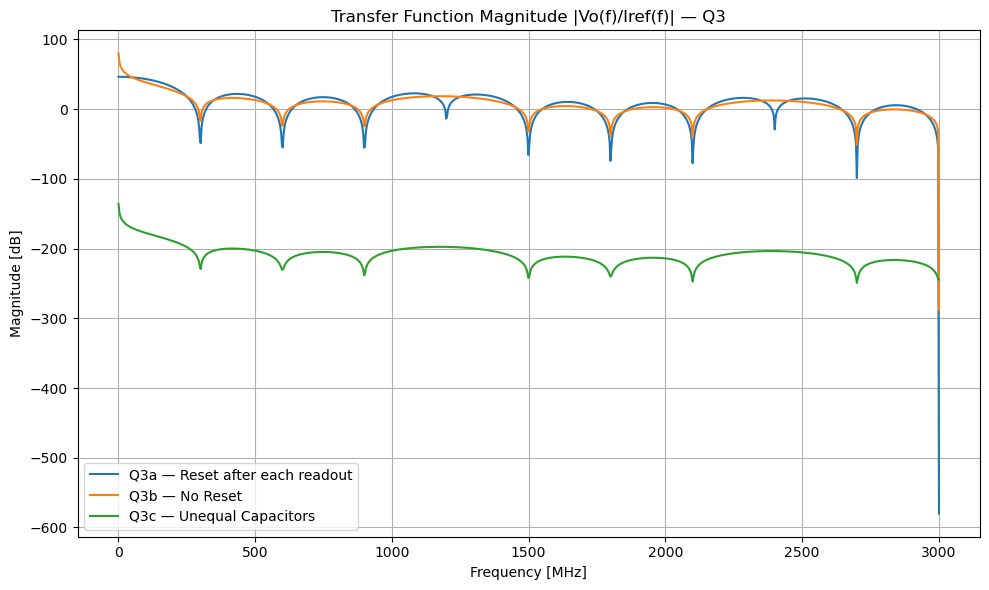

In [ ]:
def third():


    N = 8
    f_clk = 2.4e9
    T_clk = 1 / f_clk
    T = N * T_clk


    f = np.linspace(1e6, 3e9, 1000)
    w = 2 * np.pi * f


    C_nom = 15.925e-12  
    C_varied = np.array([15.925, 15.625, 16.225, 15.825]) * 1e-12  # 用于 Q3c
    num_caps = 4


    tau = np.array([0, 2, 4, 6]) * T_clk


    sum_shifted_exps = np.sum(np.exp(-1j * w[:, None] * tau), axis=1)
    H3a = (1 - np.exp(-1j * w * T)) / (1j * w * C_nom) * (1 / num_caps) * sum_shifted_exps


    H3b = (1 / (1j * w * C_nom)) * (1 / num_caps) * sum_shifted_exps

 
    C_sum = np.sum(C_varied)
    weighted_sum = np.sum([C_varied[k] * np.exp(-1j * w * tau[k]) for k in range(num_caps)], axis=0)
    H3c = (1 / (1j * w * C_sum)) * weighted_sum


    plt.figure(figsize=(10, 6))
    plt.plot(f * 1e-6, 20 * np.log10(np.abs(H3a)), label='Q3a — Reset after each readout')
    plt.plot(f * 1e-6, 20 * np.log10(np.abs(H3b)), label='Q3b — No Reset')
    plt.plot(f * 1e-6, 20 * np.log10(np.abs(H3c)), label='Q3c — Unequal Capacitors')
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('Magnitude [dB]')
    plt.title('Transfer Function Magnitude |Vo(f)/Iref(f)| — Q3')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
third()


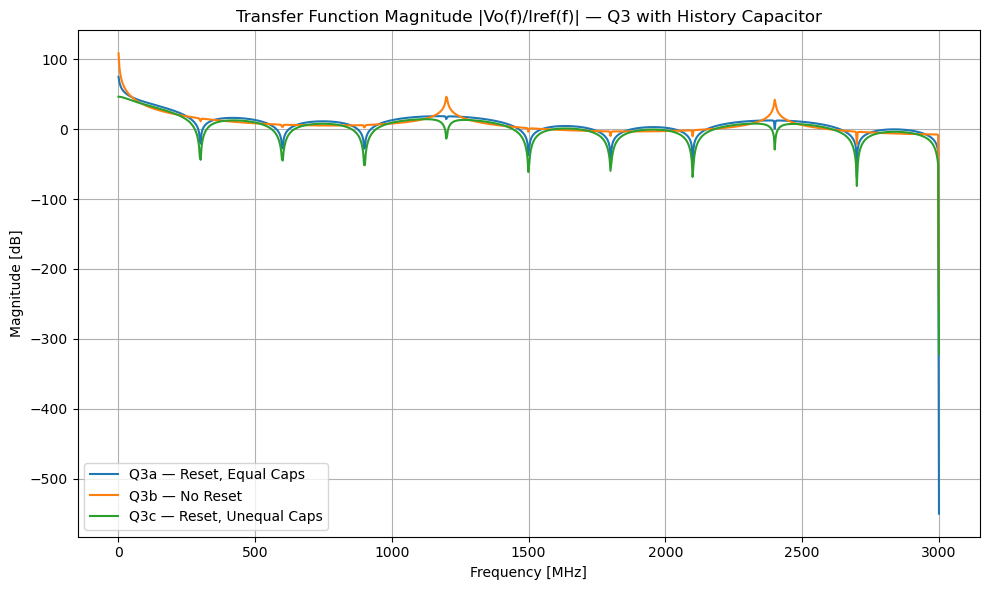

In [ ]:
def third_2():


    # === 参数设置 ===
    N = 8
    f_clk = 2.4e9
    T_clk = 1 / f_clk
    T = N * T_clk
    f = np.linspace(1e6, 3e9, 1000)
    w = 2 * np.pi * f
    z = np.exp(1j * w * T)


    num_channels = 4
    tau = np.array([0, 2, 4, 6]) * T_clk  


    C_H_common = 15.425e-12
    C_R_common = 0.5e-12
    a_common = C_H_common / (C_H_common + C_R_common)
    gain_common = T / C_R_common


    H3a = np.zeros_like(w, dtype=complex)
    for k in range(num_channels):
        delay = np.exp(-1j * w * tau[k])
        H_k = (1 - a_common) / (1 - a_common / z) * (1 - np.exp(-1j * w * T)) / (1j * w * C_R_common) * delay
        H3a += H_k
    H3a /= num_channels


    H3b = np.zeros_like(w, dtype=complex)
    for k in range(num_channels):
        delay = np.exp(-1j * w * tau[k])
        H_k = (1 - a_common) / (1 - a_common / z) * (1 / (1j * w * C_R_common)) * delay
        H3b += H_k
    H3b /= num_channels


    C_R_var = np.array([15.925, 15.625, 16.225, 15.825]) * 1e-12
    C_H_var = np.full(4, 15.425e-12)
    H3c = np.zeros_like(w, dtype=complex)
    for k in range(num_channels):
        a_k = C_H_var[k] / (C_H_var[k] + C_R_var[k])
        delay = np.exp(-1j * w * tau[k])
        H_k = (1 - a_k) / (1 - a_k / z) * (1 - np.exp(-1j * w * T)) / (1j * w * C_R_var[k]) * delay
        H3c += H_k
    H3c /= num_channels


    plt.figure(figsize=(10, 6))
    plt.plot(f * 1e-6, 20 * np.log10(np.abs(H3a)), label='Q3a — Reset, Equal Caps')
    plt.plot(f * 1e-6, 20 * np.log10(np.abs(H3b)), label='Q3b — No Reset')
    plt.plot(f * 1e-6, 20 * np.log10(np.abs(H3c)), label='Q3c — Reset, Unequal Caps')
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('Magnitude [dB]')
    plt.title('Transfer Function Magnitude |Vo(f)/Iref(f)| — Q3 with History Capacitor')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

third_2()
